###### ### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2024 Semester 1

## Assignment 1: Wine quality classification with K-NN


**Student ID(s):**     


This iPython notebook is a template which you will use for your Assignment 1 submission.

**NOTE: YOU SHOULD ADD YOUR RESULTS, DIAGRAMS AND IMAGES FROM YOUR OBSERVATIONS IN THIS FILE TO YOUR REPORT (the PDF file).**

**Adding proper comments to your code is MANDATORY. **

## 1. K-NN classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
## load the data and split them into attributes and labels 
data_train = pd.read_csv('COMP30027_2024_asst1_data/winequality-train.csv')
data_test = pd.read_csv('COMP30027_2024_asst1_data/winequality-test.csv')
X_train = data_train.iloc[:, :-1].values
Y_train = data_train.iloc[:,-1].values
X_test = data_test.iloc[:, :-1].values
Y_test = data_test.iloc[:,-1].values
print(len(Y_train))
print(np.unique(Y_train, return_counts=True))
print(len(Y_test))
print(np.unique(Y_test, return_counts=True))

1350
(array([0, 1]), array([820, 530]))
1350
(array([0, 1]), array([820, 530]))


In [3]:
## define KNN
class KNNClassifier:
    def __init__(self, k): ## initial the class with the k
        self.k = k  

    def fit(self, X_train, Y_train): ## memorize the training set
        self.X_train = X_train
        self.Y_train = Y_train
        if len(self.Y_train) < self.k:
            print("Warning: the number of the training set is smaller than the k")

    def predict(self, X_test): ## predict the function 
        Y_prediction = [self.prediction(x_test) for x_test in X_test] ## predict the label instance by instance from the test set
        return np.array(Y_prediction) ## return the predicted label

    def prediction(self, x_test): ## prediction function using KNN for a single instance
        distances = [np.sqrt(np.sum((x_train - x_test) ** 2)) for x_train in self.X_train] ## calculate Euclidean Distance
        ## using np.argsort to get the indices of k nearest distances 
        ## if there is a tie, the behaviour of np.argsort is similar to randomly selecting 
        k_indices = np.argsort(distances)[:self.k] 
        #k_nearest_labels = [self.Y_train[i] for i in k_indices] ## get the label based on indices 
        k_nearest_labels = self.Y_train[k_indices] ## get the label based on indices 
        kn_unique_labels, counts = np.unique(k_nearest_labels, return_counts=True) ## count the numbers of each label
        win_labels = kn_unique_labels[counts == np.max(counts)] ## get the label with the largest number
        if len(win_labels) > 1: ## if there is tie, i.e., more than 1 label wins 
            win_labels = self.Y_train[distances == np.min(distances)] ## get the the labels with the smallest distance (1-NN)
            return np.random.choice(win_labels) ## randomly choose one label if there is >1 smallest distance
        else:
            return win_labels[0] ## otherwise, return the only win label, add [0] in case 


In [4]:
## test the KNN-classifier with k=3
knn3 = KNNClassifier(k=3)
knn3.fit(X_train,Y_train)
predictions_knn3 = knn3.predict(X_test)
confusion_matrix(Y_test, predictions_knn3)

array([[655, 165],
       [166, 364]])

In [5]:
## test the KNN-classifier with k=4
knn4 = KNNClassifier(k=4)
knn4.fit(X_train, Y_train)
predictions_knn4 = knn4.predict(X_test)
confusion_matrix(Y_test, predictions_knn4)

array([[655, 165],
       [151, 379]])

## 2. 1-NN classification

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [6]:
## 1-NN
knn1 = KNNClassifier(k=1)
knn1.fit(X_train, Y_train)
predictions = knn1.predict(X_test)

In [7]:
knn1_CM=confusion_matrix(Y_test, predictions)
knn1_CM

array([[652, 168],
       [150, 380]])

In [8]:
## get the accuracy for question 2.1
(knn1_CM[0,0]+knn1_CM[1,1])/np.sum(knn1_CM) 

0.7644444444444445

In [9]:
data_train_subset=data_train.sample(n=135, replace=False) ## randomly subset 10%

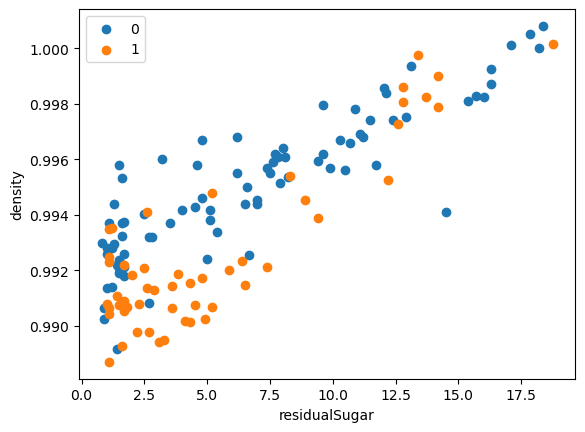

In [10]:
## for question 2.2
for label, group in data_train_subset.groupby('quality'):
    plt.scatter(group['residualSugar'], group['density'], label=label)
plt.xlabel('residualSugar')
plt.ylabel('density')
plt.legend()
plt.show()

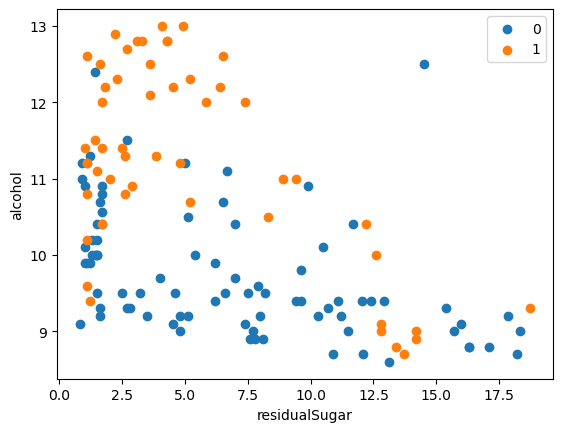

In [11]:
## for question 2.2
for label, group in data_train_subset.groupby('quality'):
    plt.scatter(group['residualSugar'], group['alcohol'], label=label)
plt.xlabel('residualSugar')
plt.ylabel('alcohol')
plt.legend()
plt.show()

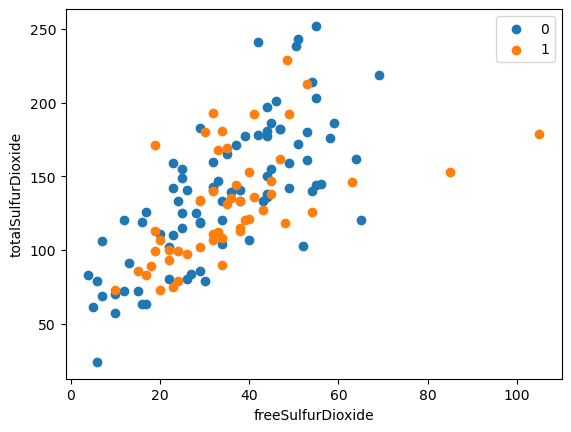

In [12]:
## for question 2.2
for label, group in data_train_subset.groupby('quality'):
    plt.scatter(group['freeSulfurDioxide'], group['totalSulfurDioxide'], label=label)
plt.xlabel('freeSulfurDioxide')
plt.ylabel('totalSulfurDioxide')
plt.legend()
plt.show()

## 3. Normalization

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

In [13]:
## Min-max scale
X_train_norm_1 = (X_train - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0))
X_test_norm_1 = (X_test - np.min(X_train, axis=0)) / (np.max(X_train, axis=0) - np.min(X_train, axis=0)) ## from the test set, using the parameters of the training set

In [14]:
## Standardize scale
X_train_norm_2 = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_norm_2 = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0) ## from the test set, using the parameters of the training set

In [15]:
## no scale resulsts
confusion_matrix(Y_test, predictions)
## accuracy=(652+380)/1350=76.44%, the answer of question 3

array([[652, 168],
       [150, 380]])

In [16]:
## Min-max scale results
knn1_norm_1 = KNNClassifier(k=1)
knn1_norm_1.fit(X_train_norm_1, Y_train)
predictions_norm_1 = knn1_norm_1.predict(X_test_norm_1)
confusion_matrix(Y_test, predictions_norm_1)
## accuracy=(705+443)/1350=85.04%, the answer of question 3

array([[705, 115],
       [ 87, 443]])

In [17]:
## Standardize scale results
knn1_norm_2 = KNNClassifier(k=1)
knn1_norm_2.fit(X_train_norm_2, Y_train)
predictions_norm_2 = knn1_norm_2.predict(X_test_norm_2)
confusion_matrix(Y_test, predictions_norm_2)
## accuracy=(709+462)/1350=86.74%, the answer of question 3

array([[709, 111],
       [ 68, 462]])

In [18]:
## Min-max scale pd for plotting
data_train_norm_1 = pd.DataFrame(X_train_norm_1, columns=data_train.columns[:-1], index=data_train.index)
data_train_norm_1['quality'] = data_train['quality']
data_train_norm_1_subset = data_train_norm_1.loc[data_train_subset.index] ## get the same subset as original for plotting
## Standardize scale pd for plotting
data_train_norm_2 = pd.DataFrame(X_train_norm_2, columns=data_train.columns[:-1], index=data_train.index)
data_train_norm_2['quality'] = data_train['quality']
data_train_norm_2_subset = data_train_norm_2.loc[data_train_subset.index] ## get the same subset as original for plotting

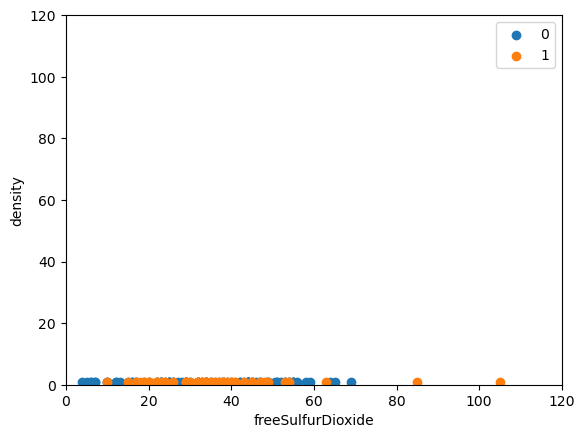

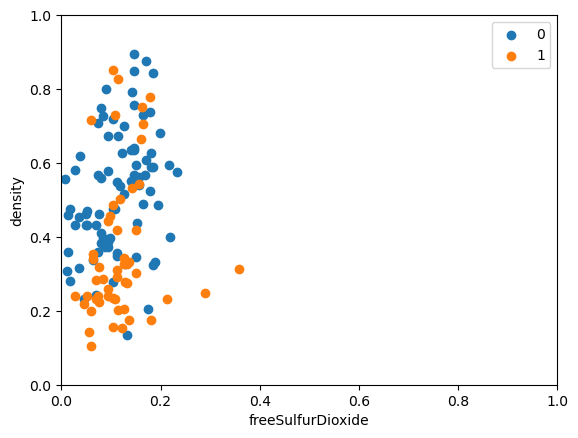

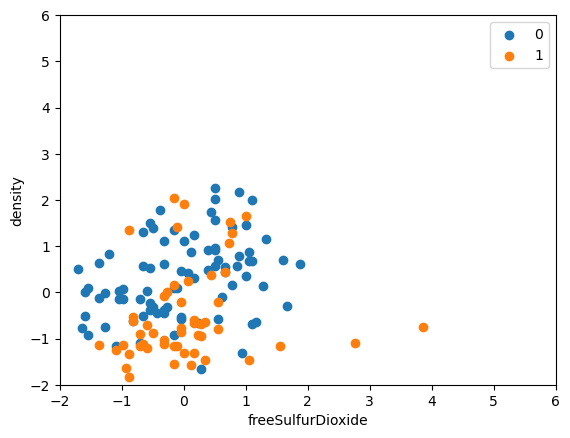

In [19]:
## answers for question 3, x and y with the same scale

## no normalization 
for label, group in data_train_subset.groupby('quality'):
    plt.scatter(group['freeSulfurDioxide'], group['density'], label=label)
plt.xlabel('freeSulfurDioxide')
plt.ylabel('density')
plt.xlim(0, 120)
plt.ylim(0, 120)
plt.legend()
plt.show()
## Min-max scale
for label, group in data_train_norm_1_subset.groupby('quality'):
    plt.scatter(group['freeSulfurDioxide'], group['density'], label=label)
plt.xlabel('freeSulfurDioxide')
plt.ylabel('density')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.show()
## Standardize scale
for label, group in data_train_norm_2_subset.groupby('quality'):
    plt.scatter(group['freeSulfurDioxide'], group['density'], label=label)
plt.xlabel('freeSulfurDioxide')
plt.ylabel('density')
plt.xlim(-2, 6)
plt.ylim(-2, 6)
plt.legend()
plt.show()

## 4. Model extensions

#### NOTE: you may develope codes or functions to help respond to the question here, but your formal answer must be submitted separately as a PDF.

### 4.1
Compare the performance of your best 1-NN model from Question 3 to a Gaussian naive Bayes model on this dataset (you may use library functions to implement the Gaussian naive Bayes model). In your write-up, state the accuracy of the naive Bayes model and identify instances where the two models disagree. Why do the two models classify these instances differently?

In [20]:
## using GNB to predict 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
confusion_matrix(Y_test, gnb_predictions)
## accuracy=(610+440)/1350=77.78% 

array([[610, 210],
       [ 90, 440]])

In [21]:
## Standardize scale results, the best model of question 3
confusion_matrix(Y_test, predictions_norm_2)
## accuracy=(709+462)/1350=86.74%

array([[709, 111],
       [ 68, 462]])

In [22]:
## 265, the number of instances where the two models disagree
np.unique(gnb_predictions == predictions_norm_2, return_counts=True)

(array([False,  True]), array([ 265, 1085]))

In [23]:
## the class of those 265 disagreed instances, 153 class 0, 112 class 1
np.unique(Y_test[gnb_predictions != predictions_norm_2], return_counts=True)

(array([0, 1]), array([153, 112]))

In [24]:
## among the 265 instances, 1-NN predicts 193 correctly, while GNB predicts 72 correctly
np.unique((predictions_norm_2 == Y_test)[gnb_predictions != predictions_norm_2],return_counts=True)

(array([False,  True]), array([ 72, 193]))

In [25]:
## among the 193 instances that 1-NN predicts correctly, 126 are class 0, and 67 are class 1
np.unique(Y_test[(predictions_norm_2 == Y_test) & (gnb_predictions != predictions_norm_2)],return_counts=True)

(array([0, 1]), array([126,  67]))

In [26]:
## among the 72 instances that GNB predicts correctly, 27 are class 0, and 45 are class 1
np.unique(Y_test[(predictions_norm_2 != Y_test) & (gnb_predictions != predictions_norm_2)],return_counts=True)

(array([0, 1]), array([27, 45]))

In [27]:
## calculate the means and the stds of class 0 and class 1 for every attribute for all instances of the training set
for i in data_train.columns[:-1]:
    print(i);
    ## print the class, mean, and std
    print("0:",np.mean(data_train[data_train['quality']==0][i]),np.std(data_train[data_train['quality']==0][i]))
    print("1:",np.mean(data_train[data_train['quality']==1][i]),np.std(data_train[data_train['quality']==1][i]))
    print("")

fixedAcidity
0: 6.9464634146341355 0.875266331524603
1: 6.773773584905658 0.769814303545831

volatileAcidity
0: 0.31591463414634163 0.1189241099701119
1: 0.2629999999999998 0.09294226245870829

citricAcid
0: 0.3337195121951218 0.1447999270979338
1: 0.3254716981132078 0.08003928369777093

residualSugar
0: 7.091707317073167 5.24783795316027
1: 5.25339622641509 4.300541626000949

chlorides
0: 0.05248048780487803 0.030336983141102135
1: 0.03821509433962262 0.01134430945745803

freeSulfurDioxide
0: 35.1859756097561 20.60997830555633
1: 34.47641509433962 13.445589526476303

totalSulfurDioxide
0: 148.79756097560977 48.26403997829825
1: 125.56981132075472 32.916100235012365

density
0: 0.9951830731707315 0.002560388084058259
1: 0.9924420754716985 0.002737418187622538

pH
0: 3.1730975609756102 0.14289144863011263
1: 3.204792452830187 0.15581088664105097

sulphates
0: 0.478670731707317 0.10087211837429733
1: 0.5032075471698111 0.133765122014554

alcohol
0: 9.823126016260156 0.8740048295715998
1:

In [28]:
## calculate the means and the stds of class 0 and class 1 for every attribute for the 265 instances
for i in data_train.columns[:-1]:
    print(i);
    print("0:",np.mean(data_test[(gnb_predictions != predictions_norm_2) & (data_test['quality']==0)][i]),np.std(data_test[(gnb_predictions != predictions_norm_2) & (data_test['quality']==0)][i]))
    print("1:",np.mean(data_test[(gnb_predictions != predictions_norm_2) & (data_test['quality']==1)][i]),np.std(data_test[(gnb_predictions != predictions_norm_2) & (data_test['quality']==1)][i]))
    print("")

fixedAcidity
0: 7.061437908496731 0.9358596190331121
1: 6.977678571428572 0.6843544692195824

volatileAcidity
0: 0.2619607843137256 0.0799085165120061
1: 0.22553571428571417 0.0766146349982715

citricAcid
0: 0.32019607843137227 0.0806628632083016
1: 0.3287500000000002 0.08651099228256658

residualSugar
0: 4.108823529411765 3.899656921591056
1: 8.548660714285717 5.515972990120813

chlorides
0: 0.0422875816993464 0.010364389260349941
1: 0.046285714285714284 0.01542691790081114

freeSulfurDioxide
0: 27.326797385620914 17.659758199870733
1: 35.94642857142857 16.237406815807773

totalSulfurDioxide
0: 121.83006535947712 39.72812685484203
1: 146.45089285714286 39.40449347911558

density
0: 0.9932901307189546 0.0021194150712756706
1: 0.9952098214285712 0.0032139808932845192

pH
0: 3.184117647058825 0.14871356602967012
1: 3.1622321428571416 0.17432374347249807

sulphates
0: 0.4843137254901964 0.11042854552976807
1: 0.48098214285714297 0.10687910243946336

alcohol
0: 10.596732026143792 0.8213983

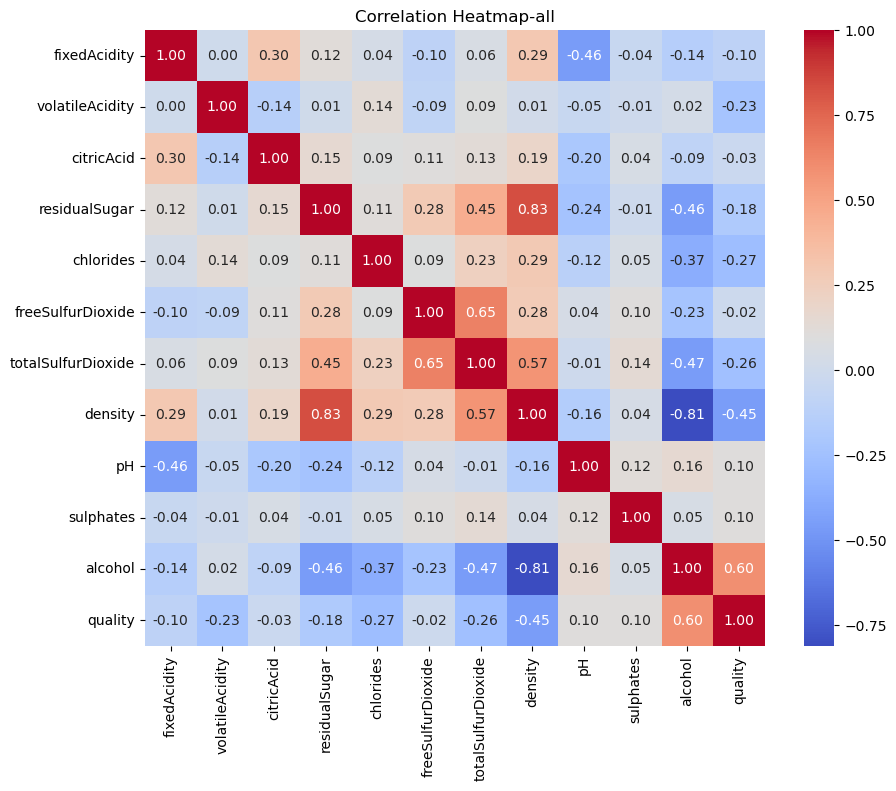

In [29]:
## the correlation of pair-wise features for all instances of the training set
import seaborn as sns
correlation_matrix = data_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap-all')
plt.show()

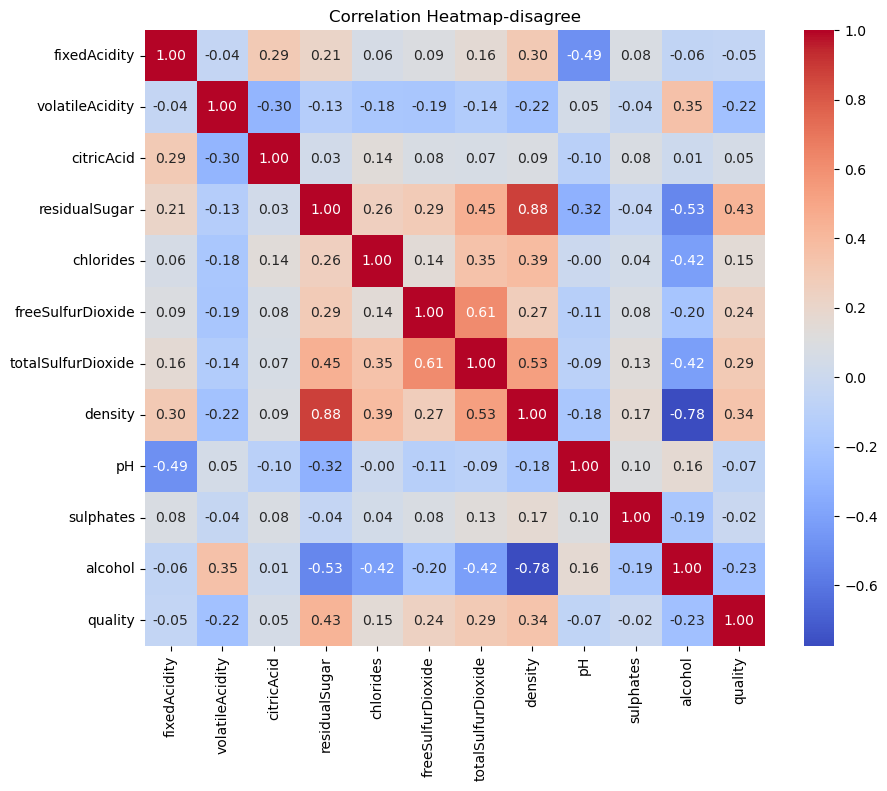

In [30]:
## the correlation of pair-wise features for the 265 instanceshe 
correlation_matrix = data_test[gnb_predictions != predictions_norm_2].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap-disagree')
plt.show()

### 4.2
Implement two additional distance measures for your K-NN model: cosine similarity and Mahalanobis distance (you may use library functions for these distance measures). Do 1-NN classification using each of these new distance measures and the three normalization options from Question 3. Discuss how the new distance metrics compare to Euclidean distance and how each metric is affected by normalization.

### 4.3
Implement either of the two K-NN weighting strategies discussed in lecture (inverse linear distance or inverse distance). Compare the performance of the weighted and majority vote models for a few different values of K. In your write-up, discuss how weighting strategy and the value of K affect the model's decisions.

### 4.4
Measure the empirical distribution of class labels in the training dataset (what percentage of the training data comes from each class). Then evaluate the distribution of labels predicted by your K-NN model for the test data, for a range of values for K. Does the class distribution of the predicted labels match the class distribution of the training data? Explain why or why not.